<a href="https://colab.research.google.com/github/SuanandaYogi/Python_Tutorial/blob/master/Sesi%202-1%20-%20Pengenalan%20Python%20untuk%20Ilmu%20Geofisika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pemodelan Kedepan 2D

$$t_i = \frac{{\sqrt {{{\left( {{x_i} - x_s} \right)}^2} + {{\left( {{y_i} - y_s} \right)}^2} } }}{v }$$

In [1]:
#memanggil modul numpy dan matplotlib.pyplot

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#membuat fungsi pemodelan kedepan waktu tiba gelombang gempa bumi pada kasus 1D

def fw_waktu_2d(coor_s,coor_i):
    #xs adalah posisi sumber (km)
    #xi adalah posisi stasiun ke-i (km)
    xi = coor_i[0]
    yi = coor_i[1]
    xs = coor_s[0]
    ys = coor_s[1]
    vp = 7 #kecepatan gelombang gempa (P) 7km/jam
    t = np.sqrt((xi-xs)**2+(yi-ys)**2)/vp #menghitung waktu tiba gelombang gempa pada stasiun ke-i
    return t #output nilai t dijadikan hasil perhitungan fungsi

In [3]:
#kita uji fungsi tersebut
fw_waktu_2d([0,0],[7,7])

1.4142135623730951

In [4]:
def Fungsi_RMS(d_cal,d_obs):
    jumlah = 0
    N = d_obs.size
    for it in range(N):
        kuadratdd = (d_cal[it]-d_obs[it])**2 #melakukan perhitungan d_cal dan d_obs ke-i
        jumlah = jumlah + kuadratdd

    rata2 = jumlah/N
    RMS = np.sqrt(rata2)
    return RMS

## Trial and Error Forward modeling

Dengan posisi stasiun yang sama, kita mencatat sebuah kejadian gempa bumi dengan data waktu tiba berikut 

|Stasiun | X (km) | Y (km) | Waktu tiba (s)|
|-|-|-|-|
|1|35|9|6.0|
|2|-44|10|6.32|
|3|-23|-39|5.85|

Coba tentukan posisi sumber gempa bumi dengan cara di atas.

RMS 1.1073320412938472


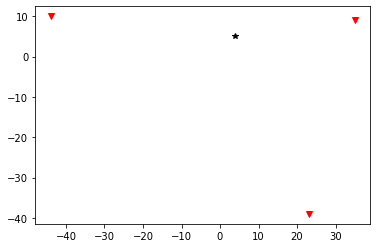

In [92]:
#kita definisikan posisi sumber dan stasiun

t_obs = np.array([6.0, 6.32, 5.85])

posisi_sumber = np.array([4,5]) #posisi sumber gempa bumi
posisi_stasiun = np.array([[35,9],[-44,10],[23,-39]])  
#print('dimensi matriks posisi_stasiun',posisi_stasiun.shape)
N_stasiun = posisi_stasiun.shape[0]


t_cal = np.zeros(N_stasiun) #menyiapkan array kosong untuk menyimpan data simulasi 
for it in range(N_stasiun):
    t_cal[it] = fw_waktu_2d(posisi_sumber,posisi_stasiun[it])

#menghitung RMS dengan fungsi sebelumnya
RMS = Fungsi_RMS(t_cal,t_obs) 
print('RMS',RMS)

#plot stasiun dan tebakan
plt.figure()
for it in range(N_stasiun):
    plt.plot(posisi_stasiun[it,0],posisi_stasiun[it,1],'rv')
plt.plot(posisi_sumber[0],posisi_sumber[1],'k*')
plt.show()

## Random Search 2D

In [65]:
#kita definisikan posisi sumber dan stasiun

t_obs = np.array([6.0, 6.32, 5.85])
posisi_stasiun = np.array([[35,9],[-44,10],[23,-39]])  
#print('dimensi matriks posisi_stasiun',posisi_stasiun.shape)
N_stasiun = posisi_stasiun.shape[0]
        
jumlah_sampel = 20000
x_range = np.linspace(-60,50,num=jumlah_sampel)
y_range = np.linspace(-50,20,num=jumlah_sampel)



In [89]:
N_random = 1000

#kita siapkan array RMS untuk menyimpan proses uji coba
list_RMS = np.zeros(N_random)
list_posisi_sumber = np.zeros((N_random,2))

for it_rand in range(N_random):
        indeks_x = np.random.randint(jumlah_sampel)
        indeks_y = np.random.randint(jumlah_sampel)
        posisi_sumber = np.array([x_range[indeks_x],y_range[indeks_y]]) #posisi sumber gempa bumi
      
        t_cal = np.zeros(N_stasiun) #menyiapkan array kosong untuk menyimpan data simulasi 
        for it in range(N_stasiun):
            t_cal[it] = fw_waktu_2d(posisi_sumber,posisi_stasiun[it])

        #menghitung RMS dengan fungsi sebelumnya
        list_RMS[it_rand] = Fungsi_RMS(t_cal,t_obs) 
        
        #menyimpan posisi sumber hasil random sampling
        list_posisi_sumber[it_rand,:] = posisi_sumber
        
Best_RMS = list_RMS[0]
Best_source = list_posisi_sumber[0]

for it_rand in range(N_random):
    if list_RMS[it_rand] <  Best_RMS:
        Best_RMS = list_RMS[it_rand]
        Best_source =  list_posisi_sumber[it_rand]

print('RMS terkecil',Best_RMS,'Pada posisi',Best_source)

RMS terkecil 0.14950114132773856 Pada posisi [-2.30761538 -8.0259013 ]


In [90]:
#list_posisi_sumber.T

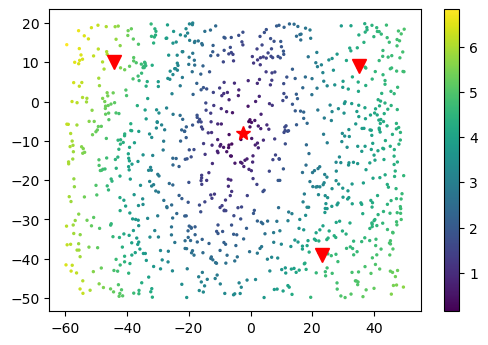

In [91]:
plt.figure(dpi=100)
plt.scatter(list_posisi_sumber.T[0,:],list_posisi_sumber.T[1,:],c=list_RMS,s=2)
for it in range(N_stasiun):
    plt.plot(posisi_stasiun[it,0],posisi_stasiun[it,1],'rv',ms=10)
plt.plot(Best_source[0],Best_source[1],'r*',ms=10)
plt.colorbar()
plt.show()


**Pengembangan dari metode ini adalah metode Simulated Annealing**